We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [42]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-28 13:56:07--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:8200:1d:d83a:40c0:93a1, 2600:9000:21c7:4600:1d:d83a:40c0:93a1, 2600:9000:21c7:f200:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:8200:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [43]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [44]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-27,27,5,2020,658,1,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-26,26,5,2020,591,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-25,25,5,2020,584,2,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-24,24,5,2020,782,11,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-23,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-22,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [45]:
df.count()

dateRep                    19875
day                        19875
month                      19875
year                       19875
cases                      19875
deaths                     19875
countriesAndTerritories    19875
geoId                      19875
countryterritoryCode       19667
popData2018                19599
continentExp               19875
dtype: int64

We pivot to a country by column format.

In [46]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-24   0.0  812.0  782.0  0.0  0.0   8.0  374.0  0.0  704.0  46.0  ...   
2020-05-25   1.0  781.0  584.0  0.0  0.0   9.0  359.0  9.0  723.0  32.0  ...   
2020-05-26   0.0  822.0  591.0  0.0  0.0   6.0  452.0  0.0  552.0  20.0  ...   
2020-05-27   0.0  779.0  658.0  0.0  0.0  25.0  289.0  2.0  600.0  38.0  ...   
2020-05-28   0.0  883.0  625.0  0.0  0.0  21.0  372.0  0.0  705.0  18.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-24    0.0  0.0  0.0  0.0  0.0  0.0  6.0  10.0  0.0  0.0  
2020-05-25    0.0  0.0  0.0  0.0  0.0  0.0  3.0  22.0  0.0  0.0  
2020-05-26    0.0  0.0  0.0  0.0  0.0  1.0  3.0  52.0  0.0  0.0  
2020-05-27    0.0  1.0  0.0  0.0  0.0  0.0  4.0  43.0  0.0  0.0  
2020-05-28    0.0  0.0  0.0  0.0  0.0  0.0  4.0  28.0  0.0  0.0  

[150 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [47]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.min() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2020-12-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2020-12-26 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-27 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-28 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-29 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-30 NaN  NaN NaN NaN NaN NaN NaN  

[366 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [48]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    366.000000
mean     182.500000
std      105.799338
min        0.000000
25%       91.250000
50%      182.500000
75%      273.750000
max      365.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach, selecting country and measure and columns to creat for smoothed and predicted measures.

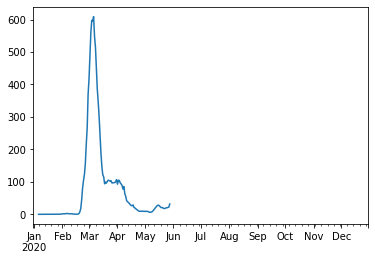

In [49]:
country  = 'KR'
measure  = 'cases'
smeasure = 'scases'
pmeasure = 'pcases'

df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()

df_pred = pd.DataFrame({
    'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
df_pred[measure].plot()

The typical progress of an outbreak is assumed to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(- (x - mu) / beta))`, where `mu` is the location parameter and `beta` the scale parameter.

In [50]:
def gumbelval(x, beta, mu):
    """Return the Gumbel CDF for x according to beta and mu"""
    return np.exp(- np.exp(- (x - mu) / beta))

def gumbelinv(x):
    """Inverse Gumbel function"""
    return(- np.log(- np.log(x)))

To ignore early outbreaks and long tails, we define the minimum case count as one in million and find the current total number of cases for scaling.

In [51]:
popdata = df[df['geoId'] == country]['popData2018'].iloc[0]
mincases = popdata / 1e6
numcases = df_pred[measure].sum()
print(mincases, numcases)

51.635256 11219.57142857143


From our dataframe we select only the days with cases above the minimum and create a column with cumulative data for fitting the Gumbel distribution, which is cumulative.

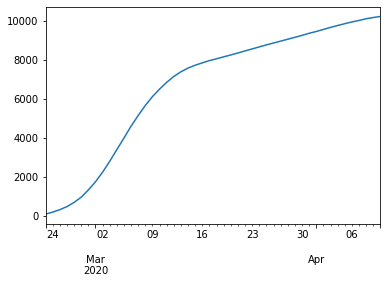

In [52]:
df_pred = df_pred[df_pred[measure] > mincases]
df_pred['cumul'] = df_pred[measure].cumsum()
df_pred['cumul'].plot()

For correct scaling of the data we need to find the current progress of the outbreak, in other words, what part of the distribution we wil try to fit. The function below takes a progress as input and determines the fit for that assumed amount of progress, returning the residuals of the fit as a measure to be minimized.

Preparing for the fit, we normalize our input and scale with the current number for progress. Preventing numerical errors we select cases below one, taking the double negative logarithm after we make sure the input is at least 10 measures, to prevent spurious fits. (Such as fitting a line on just two measures, which would be perfect but not relevant.)

In [53]:
def fitres(progress):
    """Try to fit a line according to progress, returning residuals of fit"""
    global df_pred, fit
    
    # Scale the cumulative measure and only keep cases below 1 for fitting
    df_pred['scaled'] = df_pred['cumul'] / numcases * progress
    df_fit = df_pred[df_pred['scaled'] < 1].copy()
    
    # Only try fitting if we have at least 10 measures left.
    if len(df_fit) > 9:
        df_fit['linear'] = gumbelinv(df_fit['scaled'])
        fit = np.polyfit(x=df_fit['daynum'], y=df_fit['linear'], deg=1, full=True)
        #print('Progress {:13.9f} gives {:13.9f} for {:1.0f} measures'.format(
        #    progress, fit[1][0], len(df_fit)))
        return(fit[1][0])
    else:
        return np.nan

An optimizer can call the function repeatedly to find the input that returns the best output. In this case `minimize` will find the progress that returns the lowest residuals, indicating the best fit. We use the `bound` method of `minimize_scalar` to find the minimum value. We assume at least 10% progress in the outbreak and allow for fitting on data where the first wave is already finished, to a maximum of 150%.

In [54]:
from scipy.optimize import minimize_scalar

optim = minimize_scalar(fitres, method='bounded', bounds=(0.1, 1.5), options={'disp':3})

 
 Func-count     x          f(x)          Procedure
    1       0.634752      3.38779        initial
    2       0.965248      3.61703        golden
    3       0.430495       2.5733        golden
    4       0.304257      2.04998        golden
    5       0.226238      1.71905        golden
    6       0.178019      1.50721        golden
    7       0.148219      1.37105        golden
    8       0.129801      1.28385        golden
    9       0.118418      1.22842        golden
   10       0.111383      1.19344        golden
   11       0.107035      1.17151        golden
   12       0.104348      1.15783        golden
   13       0.102687      1.14933        golden
   14       0.101661      1.14405        golden
   15       0.101026      1.14078        golden
   16       0.100634      1.13876        golden
   17       0.100392       1.1375        golden
   18       0.100242      1.13673        golden
   19        0.10015      1.13625        golden
   20       0.100093      1.13596 

The optimization gives detailed results, such as the best result in `fun`, the number of iterations in `nfev` and the optimal input in `x`. That number represents the progress, e.g. a result of `0.77` would mean that we estimate the outbreak at 77% of total cases for the current wave. We call `fitres` one more time to obtain the fit for the best value of progress.

In [55]:
progress = optim.x
print(optim)
minfit = fitres(progress)

     fun: 1.13550218166564
 message: 'Solution found.'
    nfev: 26
  status: 0
 success: True
       x: 0.10000501038868437


The `scaled` column contains the scaled cumulative distribution that should approach the correct part of a gumbel cumulative distribution for values below 1.

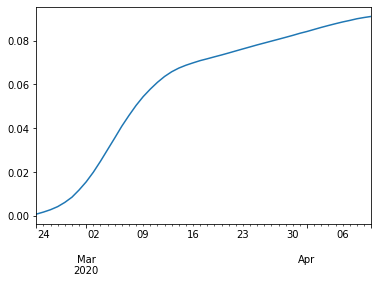

In [56]:
df_pred['scaled'].plot()

We can check the fit with `polyval`, applying the linear factors to the input column with day numbers and plotting both `linear` and `fitted` for a visual check.

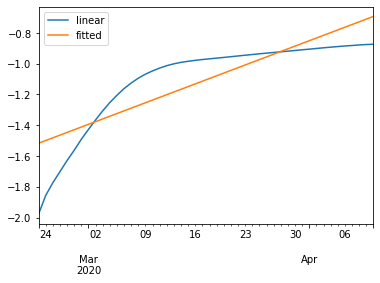

In [57]:
df_pred['linear'] = gumbelinv(df_pred[df_pred['scaled'] < 1]['scaled'])
df_pred['fitted'] = np.polyval(fit[0], df_pred['daynum'])
df_pred[['linear', 'fitted']].plot()

From slope and intercept of this line we calculate beta and mu of the Gumbel distribution by converting `y = ax + b` to `y = (x - mu) / beta`, where `beta = 1 / a` and `mu = -b / a`.

In [58]:
slope = fit[0][0]
intercept = fit[0][1]
print('Slope {:1.6f} with intercept at {:1.3f}'.format(slope, intercept))
beta = 1 / slope
mu = - intercept / slope
print('Gumbel beta {:1.3f} with mu at {:1.0f}'.format(beta, mu))

Slope 0.017523 with intercept at -2.463
Gumbel beta 57.067 with mu at 141


Finished fitting, now back to the original data! We apply the Gumbel function to `daynum` and scale the result back to the number of cases according to the estimated progress. The result is the CDF, so we reduce that to the PDF by taking the gradient.

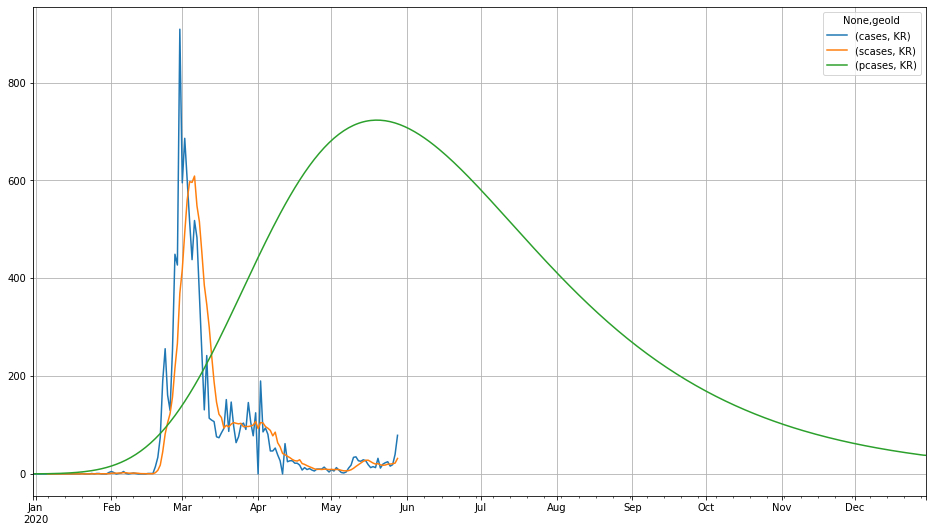

In [59]:
df_geo[(pmeasure, country)] = np.gradient(gumbelval(df_geo['daynum'], beta, mu) * numcases / progress)
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
    figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

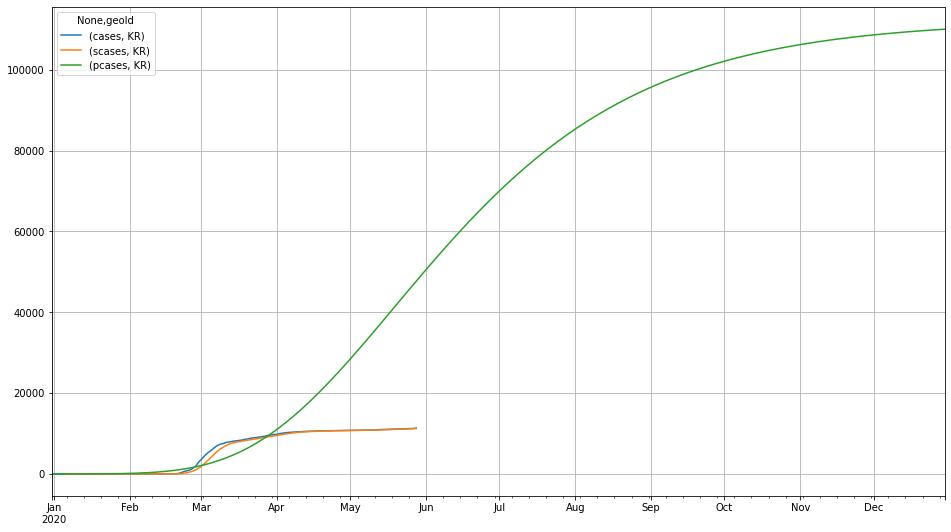

In [60]:
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
    figsize=(16, 9), grid=True)

The end value of the cumulative data would be the estimated total number, which should match the current number of cases and estimated progress.

In [61]:
final = df_geo[pmeasure][country].cumsum().max()
print('Final of {:1.0f} from an estimate of {:1.0f}'.format(final, numcases / progress))

Final of 110032 from an estimate of 112190


The peak can be found at the first predicted value that is larger than the next.

In [62]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-05-20


The floor is defined as the first time that the number of reported cases falls below 2 in a million, which is the first time that happens *after* the peak.

In [63]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) & (
    df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-12-12


Similarly, we can calculate the start as the first day where the number of cases was above 2 in a million before the peak.

In [64]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) & (
    df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-02-15


We define the maximum delta as the day in the curve with the sharpest rise.

In [65]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 11 on 2020-03-26


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

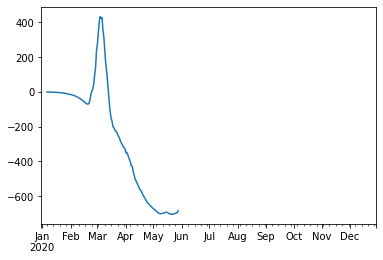

In [66]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).plot()

Keep exploring! Stay home, wash your hands, keep your distance.